<center><h1> Universidade Federal do ABC </h1></center>

<center><h1> Relatório - Laboratório n.3 </h1></center>

<center><h3> Nome: Rafael Costa Fernandes </h3></center>
<center><h3>  RA: 21201920754 </h3></center>

# Resumo

# Metodologia

# Resultados

# Exercício 1

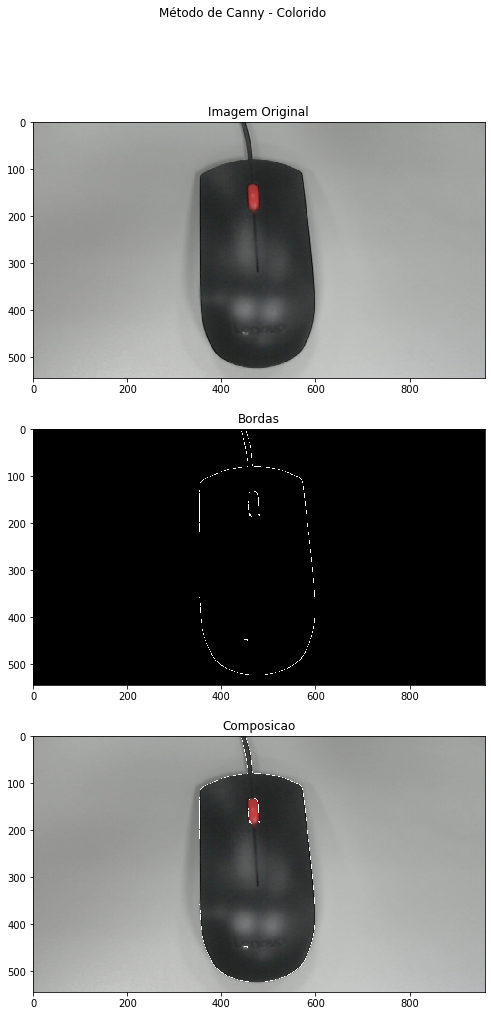

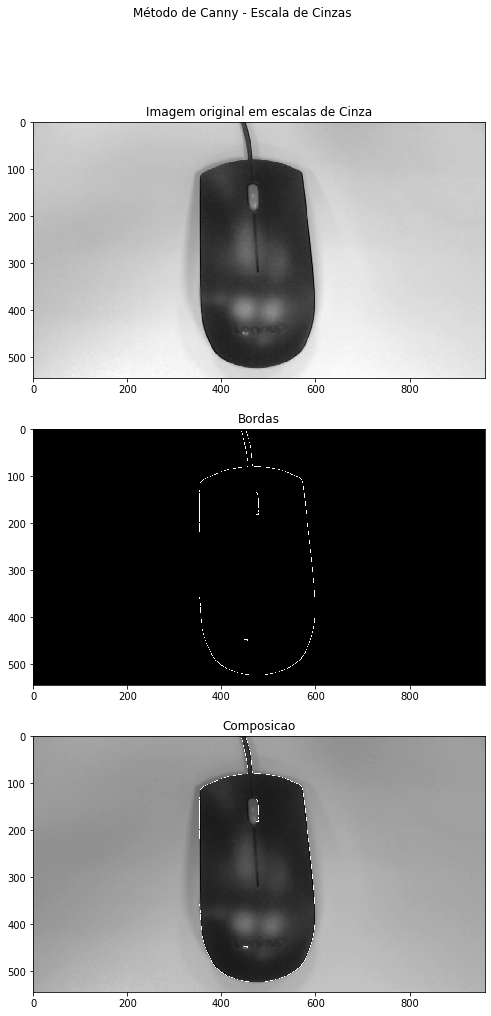

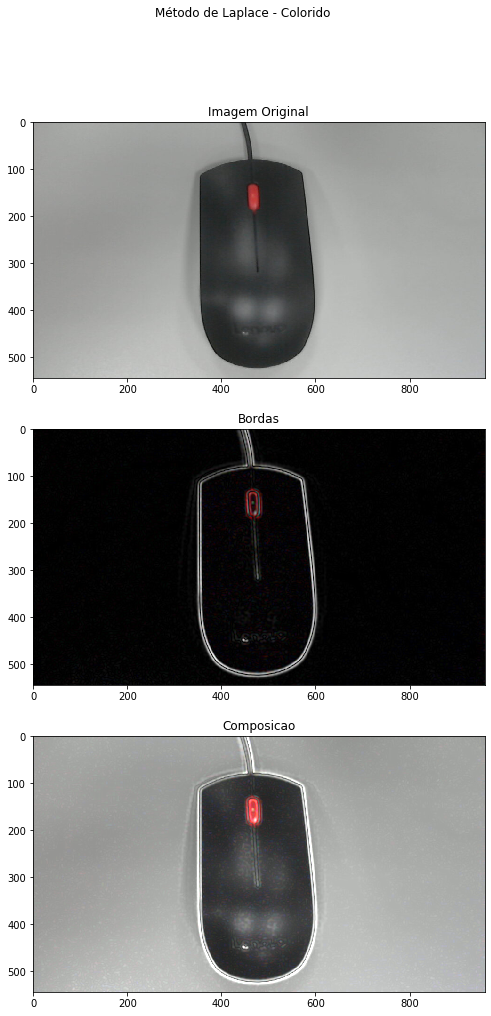

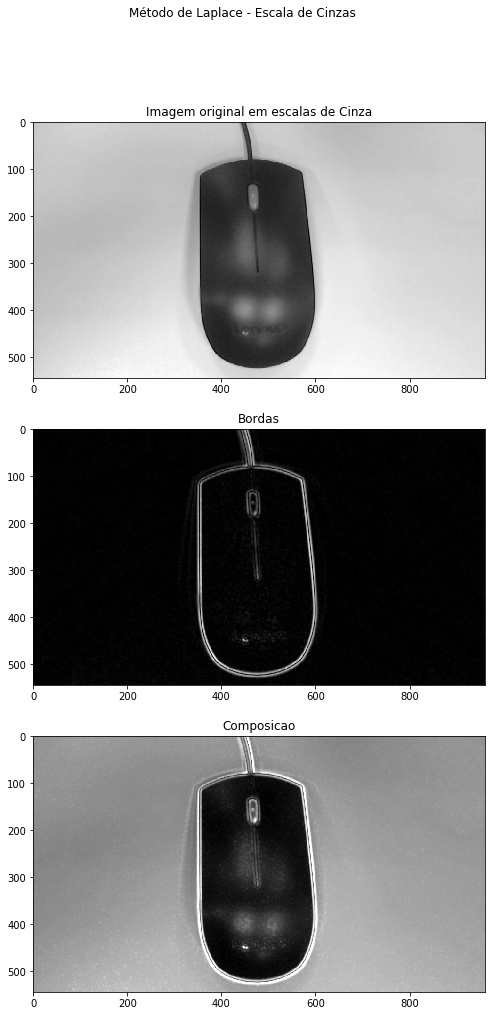

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

plt.close('all')

## METODO DE CANNY

#COLORIDO
img = cv.imread('./arq_aux/objeto.jpg', 1)
edges = cv.Canny(img,100,200)


fig = plt.figure(figsize=(18, 16))
fig.suptitle('Método de Canny - Colorido')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(311).imshow(img_rgb)
plt.title('Imagem Original')

plt.subplot(312).imshow(edges, cmap='gray')
plt.title('Bordas')

height, width, channels = img_rgb.shape    
edges_rgb = np.ones((height, width, channels), np.uint8)
for i in range(channels):
    edges_rgb[:, :, i] = np.multiply(edges_rgb[:, :, i], edges)

img_sum = cv.add(img_rgb, edges_rgb)
plt.subplot(313).imshow(img_sum)
plt.title('Composicao')
plt.show()


#ESCALA DE CINZAS
img = cv.imread('./arq_aux/objeto.jpg', 0)
edges = cv.Canny(img,100,200)

fig2 = plt.figure(figsize=(18, 16))
fig2.suptitle('Método de Canny - Escala de Cinzas')
plt.subplot(311).imshow(img, cmap='gray')
plt.title('Imagem original em escalas de Cinza')

plt.subplot(312).imshow(edges, cmap='gray')
plt.title('Bordas')

img_sum = cv.add(img, edges)
plt.subplot(313).imshow(img_sum, cmap='gray')
plt.title('Composicao')
plt.show()


## METODO DE LAPLACE
#COLORIDO
img = cv.imread('./arq_aux/objeto.jpg', 1)
heigth, width, channels = img.shape
edges = cv.Laplacian(img, cv.CV_64F, ksize = 25)

#NORMALIZACAO DAS BORDAS PARA UINT8
edges = np.abs(edges)
edges = edges/edges.max()*255
edges = np.clip(edges, 0, 255)
edges = edges.astype(np.uint8)


fig = plt.figure(figsize=(18, 16))
fig.suptitle('Método de Laplace - Colorido')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(311).imshow(img_rgb)
plt.title('Imagem Original')


img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
edges_rgb = cv.cvtColor(edges, cv.COLOR_BGR2RGB)
plt.subplot(312).imshow(edges_rgb)
plt.title('Bordas')

img_sum = cv.add(img_rgb, edges_rgb)
plt.subplot(313).imshow(img_sum)
plt.title('Composicao')
plt.show()


#ESCALA DE CINZAS
img = cv.imread('./arq_aux/objeto.jpg', 0)
edges = cv.Laplacian(img, cv.CV_64F, ksize = 25)
edges = np.abs(edges)
edges = edges/edges.max()*255
edges = np.clip(edges, 0, 255)
edges = edges.astype(np.uint8)

fig2 = plt.figure(figsize=(18, 16))
fig2.suptitle('Método de Laplace - Escala de Cinzas')
plt.subplot(311).imshow(img, cmap='gray')
plt.title('Imagem original em escalas de Cinza')

edges = np.clip(edges, 0, 255)
plt.subplot(312).imshow(edges, cmap='gray')
plt.title('Bordas')

img_sum = cv.add(img, edges)
plt.subplot(313).imshow(img_sum, cmap='gray')
plt.title('Composicao')
plt.show()

# Exercício 2

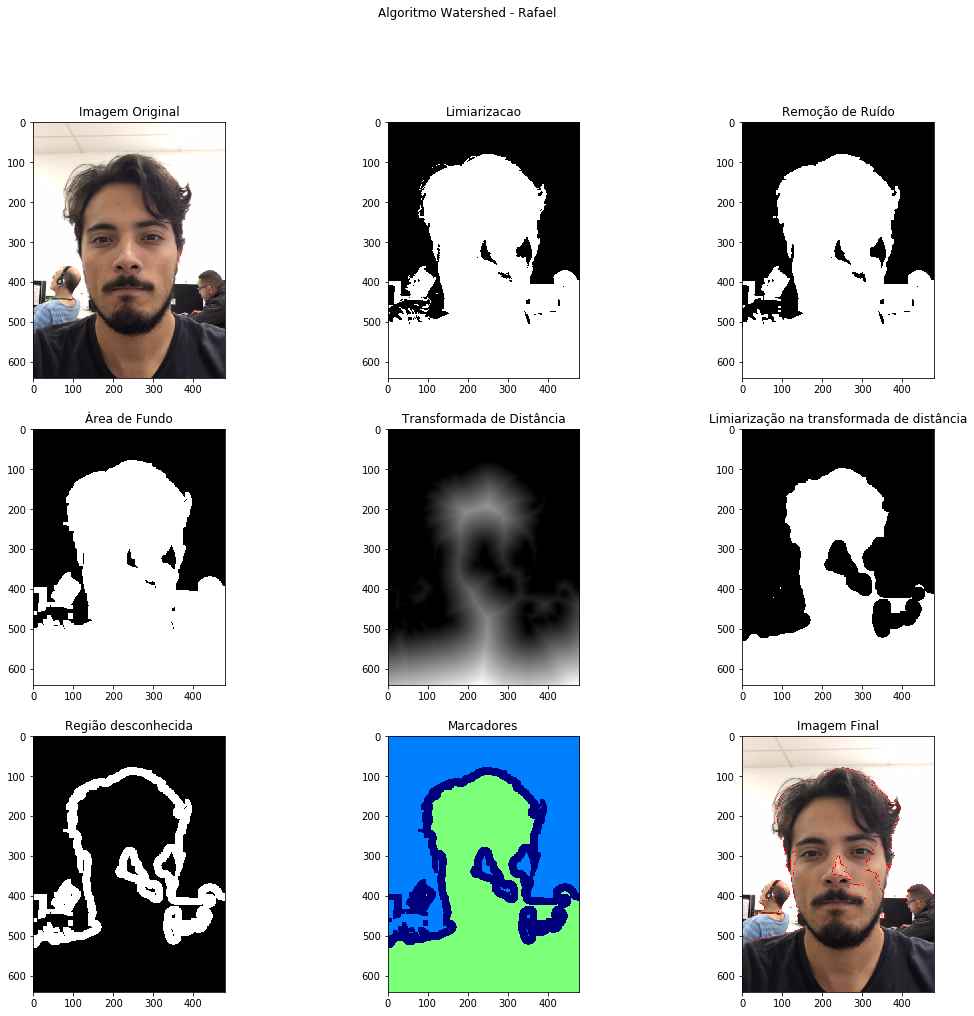

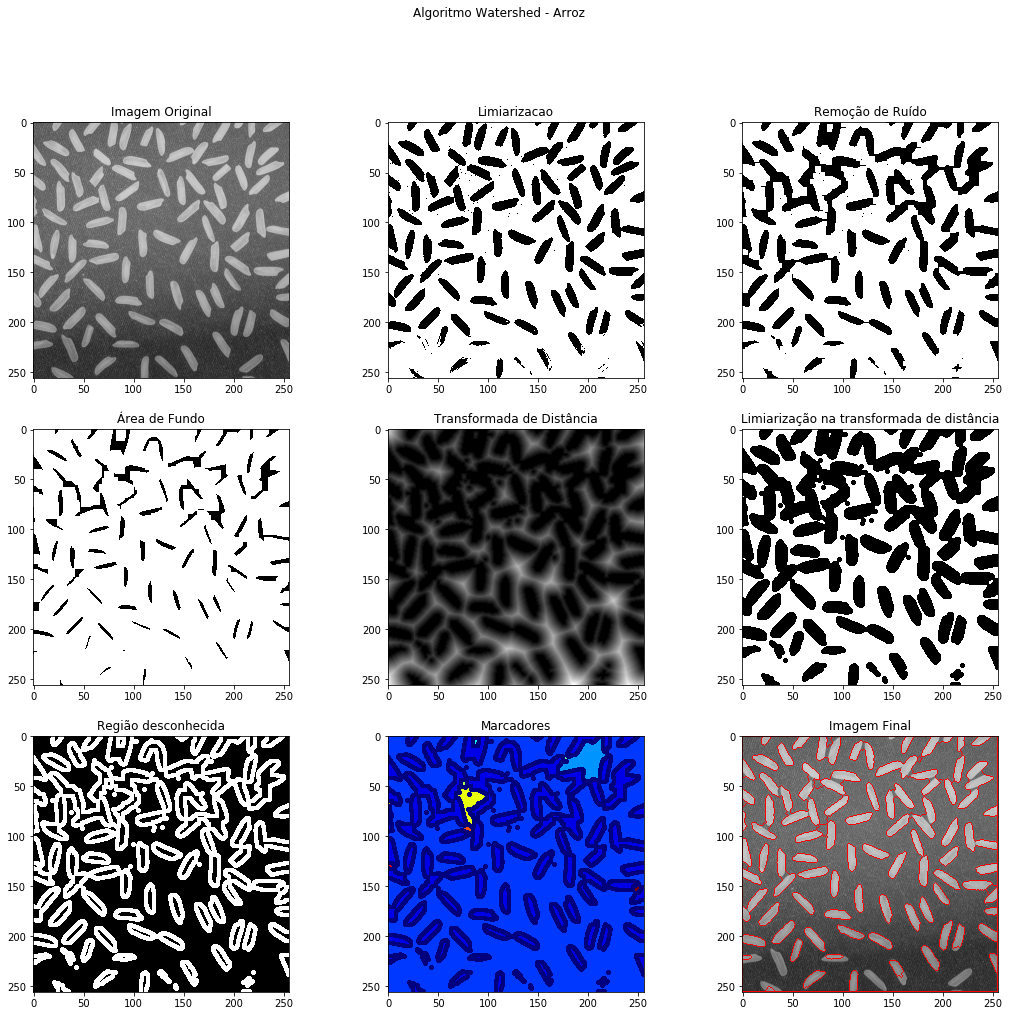

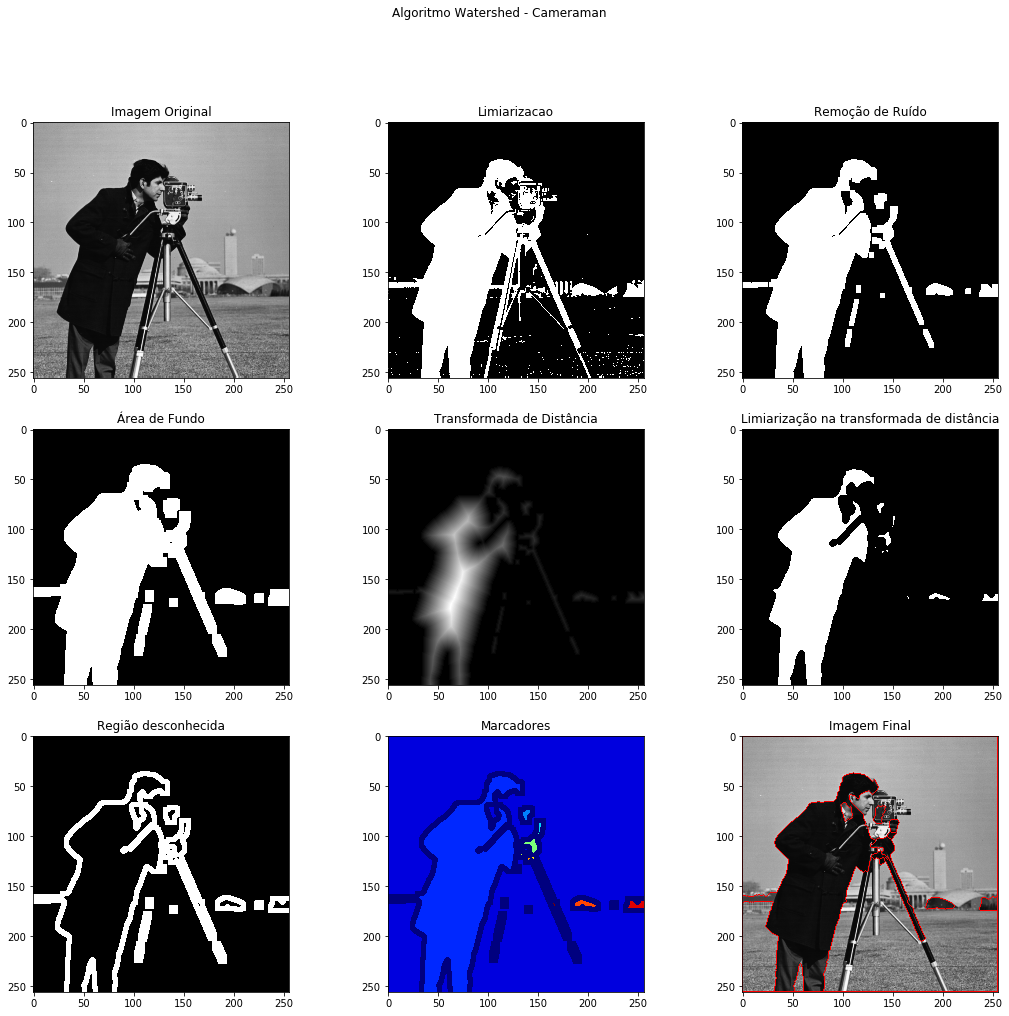

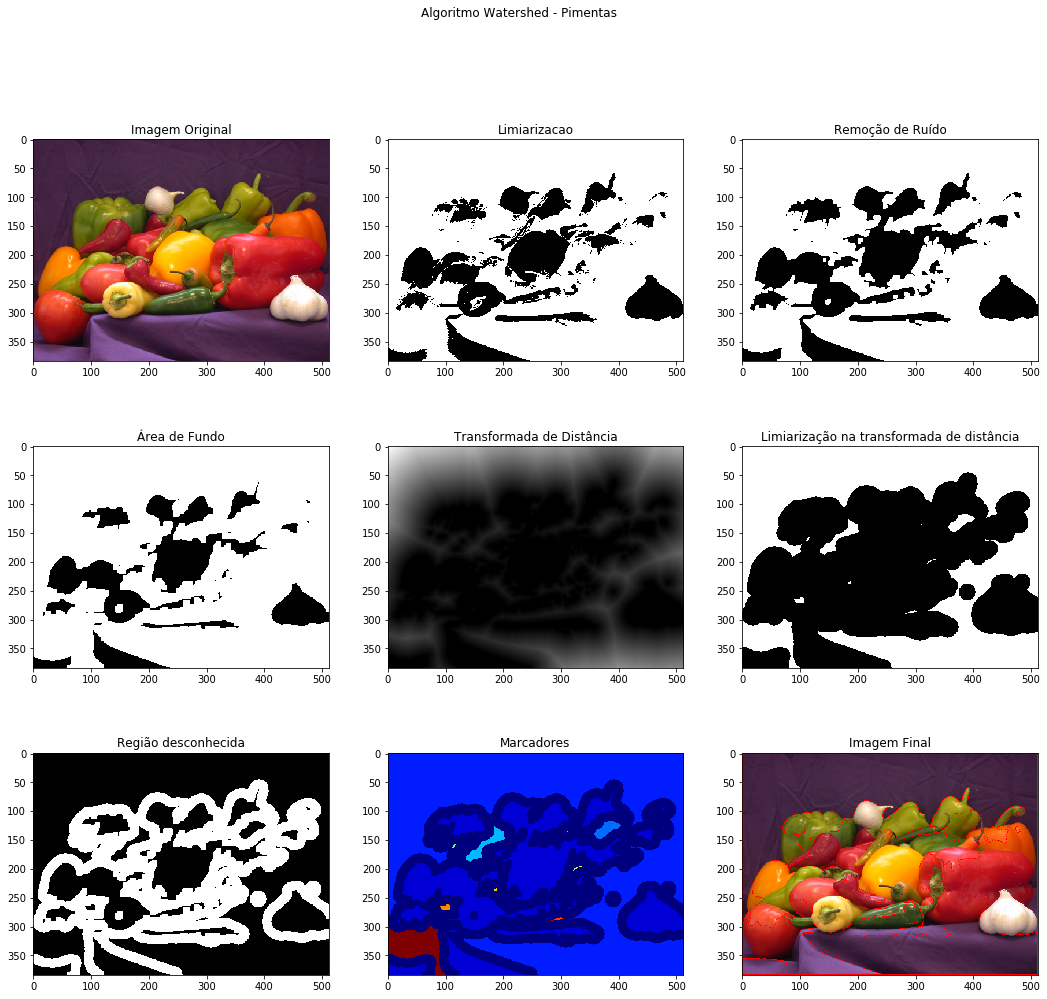

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
plt.close('all')


images = (cv.cvtColor(cv.imread('./arq_aux/rafael.jpeg'), cv.COLOR_BGR2RGB),
          cv.imread('./arq_aux/rice.png'),
          cv.imread('./arq_aux/cameraman.tif'),
          cv.cvtColor(cv.imread('./arq_aux/peppers.png'), cv.COLOR_BGR2RGB))

titles = ('Algoritmo Watershed - Rafael',
          'Algoritmo Watershed - Arroz',
          'Algoritmo Watershed - Cameraman',
          'Algoritmo Watershed - Pimentas')


for img, title in zip(images, titles):    
    plt.figure(figsize=(18, 16))
    
    plt.suptitle(title)
    plt.subplot(331).imshow(img)
    plt.title('Imagem Original')
    
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    
    plt.subplot(332).imshow(thresh, cmap='gray')
    plt.title('Limiarizacao')
    
    # noise removal
    kernel = np.ones((3,3), np.uint8)
    opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations = 2)
    
    plt.subplot(333).imshow(opening, cmap='gray')
    plt.title('Remoção de Ruído')
    
    # sure background area
    sure_bg = cv.dilate(opening, kernel, iterations=2)
    
    plt.subplot(334).imshow(sure_bg, cmap='gray')
    plt.title('Área de Fundo')
    
    # Finding sure foreground area
    dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
    
    plt.subplot(335).imshow(dist_transform, cmap='gray')
    plt.title('Transformada de Distância')
    
    ret, sure_fg = cv.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)
    
    plt.subplot(336).imshow(sure_fg, cmap='gray')
    plt.title('Limiarização na transformada de distância')
    
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv.subtract(sure_bg, sure_fg)
    
    plt.subplot(337).imshow(unknown, cmap='gray')
    plt.title('Região desconhecida')
    
    # Marker labelling
    ret, markers = cv.connectedComponents(sure_fg)
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1
    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    
    plt.subplot(338).imshow(markers, cmap='jet')
    plt.title('Marcadores')
    
    markers = cv.watershed(img, markers)
    img[markers == -1] = [255,0,0]
    
    plt.subplot(339).imshow(img)
    plt.title('Imagem Final')

# Conclusões e Discussões

As ferramentas de manipulação de imagens aprendidas neste laboratório serão de fundamental importância em tarefas mais avançadas no decorrer do curso, visto que só após um tratamento adequado será possível recuperar as informações necessarias da imagem. Também fica claro que é possível realizar muitas tarefas sem a utilização da biblioteca OpenCV, mas que a sua capacidade de pararelismo de processos a torna muito útil em algoritmos mais complexos e que demandem maior poder computacional.
